<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Read Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df=pd.DataFrame(data)
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.rename(columns={"6": "Pregnancies", "148": "Glucose", "72":"BloodPressure","35":"SkinThickness","0":"Insulin","33.6":"BMI","0.627":"DiabetesP","50":"Age","1":"HasDiabetes"},inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
B=pd.DataFrame({'Pregnancies':[6],'Glucose':[148],'BloodPressure':['72'],'SkinThickness':[35],'Insulin':[0],'BMI':[33.6],'DiabetesP':[0.627],'Age':[30],'HasDiabetes':[1]})
B

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,30,1


In [7]:
df = pd.concat([B, df]).reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,30,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for Missing Data

In [8]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesP        0
Age              0
HasDiabetes      0
dtype: int64

### Handle CategorValuesical 

In [9]:
df["Pregnancies"] = df["Pregnancies"].replace(0,df["Pregnancies"].median())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].median())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].median())   
df["DiabetesP"] = df["DiabetesP"].replace(0,df["DiabetesP"].median())
df["Age"] = df["Age"].replace(0,df["Age"].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,30,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [10]:
df["BMI"] = df["BMI"].replace(0,df["BMI"].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesP,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,30,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


### Data Analysis

C:\anaconda 1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasDiabetes', ylabel='count'>

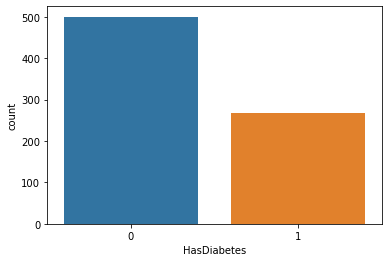

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x=df['HasDiabetes']
sns.countplot(x,label="Count")   #here 0 shows not diabetes and 1 shows diabetes

<AxesSubplot:>

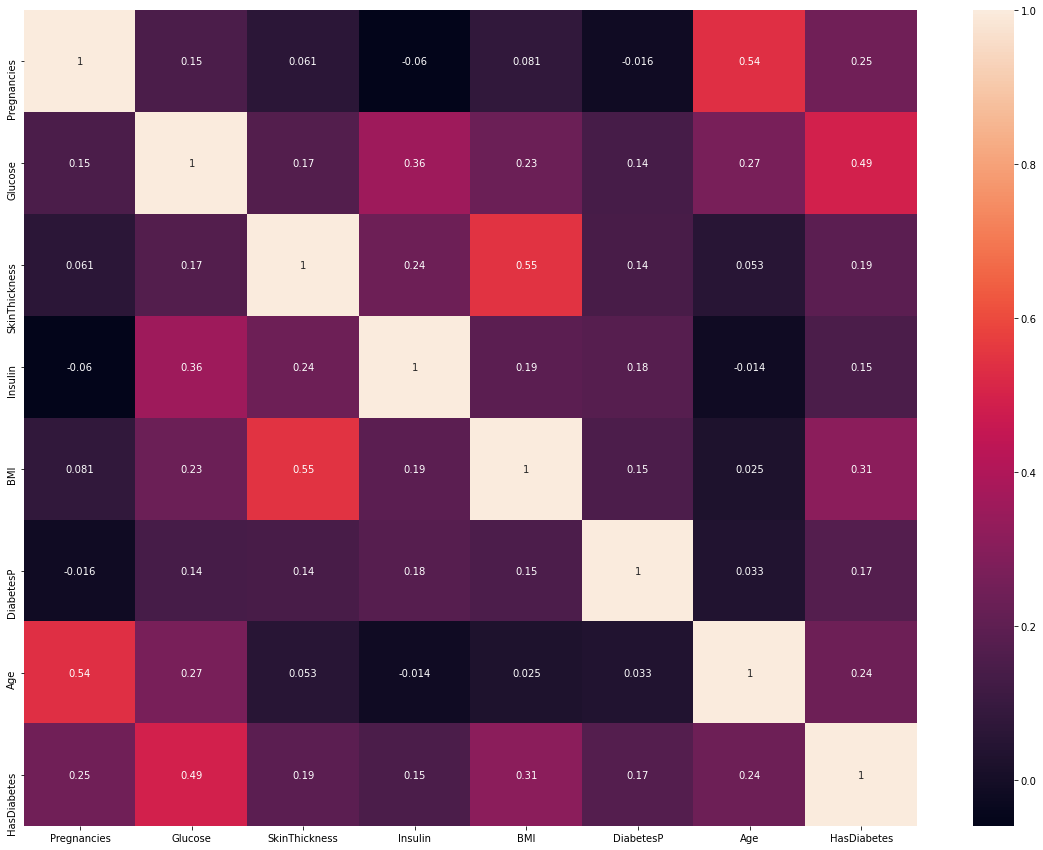

In [12]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True)   #heatmap showig the correlation

### From the correlation heatmap, we can see that
   -- Age and refractive index has high positive correlation(0.54).
   
   -- Diabetesp and refractive index has high negative correlation(-0.034).

### Split Data for Training and Testing

In [13]:
X=df.drop(['HasDiabetes'],axis=1)
Y=df['HasDiabetes']
print(X)
print(Y)

     Pregnancies  Glucose BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148            72             35     30.5  33.6   
1              1       85            66             29     30.5  26.6   
2              8      183            64             23     30.5  23.3   
3              1       89            66             23     94.0  28.1   
4              3      137            40             35    168.0  43.1   
..           ...      ...           ...            ...      ...   ...   
763           10      101            76             48    180.0  32.9   
764            2      122            70             27     30.5  36.8   
765            5      121            72             23    112.0  26.2   
766            1      126            60             23     30.5  30.1   
767            1       93            70             31     30.5  30.4   

     DiabetesP  Age  
0        0.627   30  
1        0.351   31  
2        0.672   32  
3        0.167   21  
4        2.28

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

### Apply different Classification Algorithms and tune them

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

model1 = LogisticRegression(max_iter=10000)
model2 = LinearSVC(dual=False)
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GaussianNB()
model6 = GradientBoostingClassifier()

In [16]:
clf=[]
clf.append(model1)
clf.append(model2)
clf.append(model3)
clf.append(model4)
clf.append(model5)
clf.append(model6)

### Get performance metrics for all the applied classifiers

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

for i in clf:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  A=accuracy_score(y_test, y_pred)
  print("Model is: ",i)
  print("Accuracy is %s"%(A*100),'%')
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix is %s"%(cm))
  print('\n\n')

Model is:  LogisticRegression(max_iter=10000)
Accuracy is 83.11688311688312 %
Confusion Matrix is [[98  9]
 [17 30]]



Model is:  LinearSVC(dual=False)
Accuracy is 82.46753246753246 %
Confusion Matrix is [[98  9]
 [18 29]]



Model is:  DecisionTreeClassifier()
Accuracy is 77.27272727272727 %
Confusion Matrix is [[87 20]
 [15 32]]



Model is:  RandomForestClassifier()
Accuracy is 81.16883116883116 %
Confusion Matrix is [[93 14]
 [15 32]]



Model is:  GaussianNB()
Accuracy is 79.87012987012987 %
Confusion Matrix is [[92 15]
 [16 31]]



Model is:  GradientBoostingClassifier()
Accuracy is 83.76623376623377 %
Confusion Matrix is [[95 12]
 [13 34]]





In [18]:
from sklearn.metrics import classification_report

for i in clf:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  B=classification_report(y_test,y_pred)
  print("Classification Report of %s is \n%s"%(i, B))

Classification Report of LogisticRegression(max_iter=10000) is 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154

Classification Report of LinearSVC(dual=False) is 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Classification Report of DecisionTreeClassifier() is 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       107
           1       0.62      0.68      0.65        47

    accuracy 

### Visually compare the performance of all classifiers

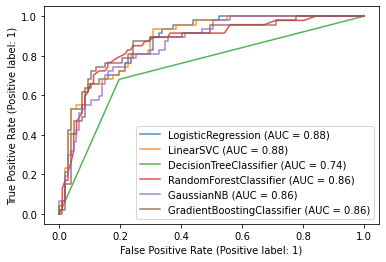

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

for j in clf:
  j.fit(X_train,y_train)
  ax = plt.gca()
  rfc_disp = plot_roc_curve(j, X_test, y_test, ax=ax, alpha=0.8)
  #svc_disp.plot(ax=ax, alpha=0.8)

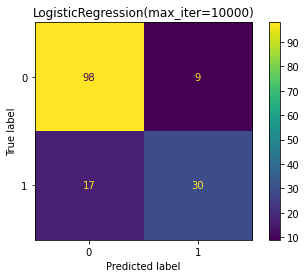

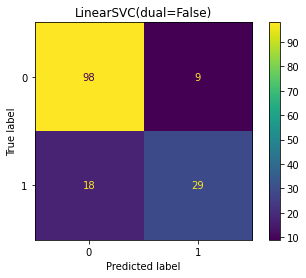

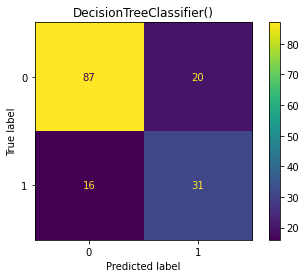

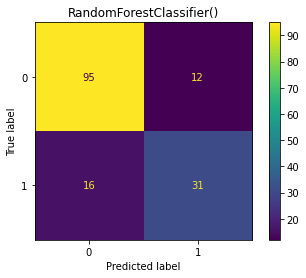

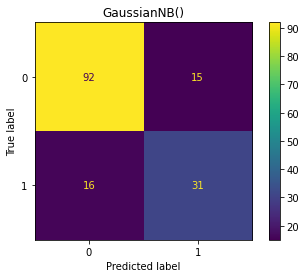

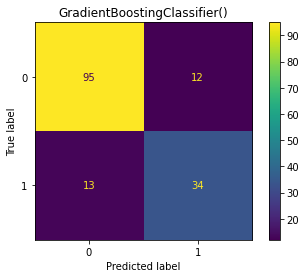

In [20]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

for j in clf:
  j.fit(X_train,y_train)
  disp = plot_confusion_matrix(j, X_test, y_test)
  disp.ax_.set_title(j)

plt.show()


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
Xg=GradientBoostingClassifier()
Xg.fit(X_train,y_train)


GradientBoostingClassifier()

In [22]:
pred=Xg.predict(X_test)
pred[:10]


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [23]:
A=accuracy_score(y_test,pred)
print("Accuracy is %s"%(A*100),'%')
cm = confusion_matrix(y_test,pred)
print("Confusion Matrix is %s"%(cm))

Accuracy is 83.76623376623377 %
Confusion Matrix is [[95 12]
 [13 34]]


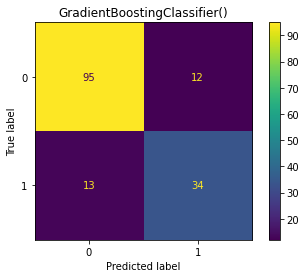

In [24]:
Xg.fit(X_train,y_train)
disp = plot_confusion_matrix(j, X_test, y_test)
disp.ax_.set_title(j)

plt.show()


In [25]:
y_test[:10]

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
Name: HasDiabetes, dtype: int64

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       107
           1       0.74      0.72      0.73        47

    accuracy                           0.84       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.84      0.84      0.84       154

